In [ ]:
#run this if previous cell doesnt work
# !pip uninstall numpy==1.21.6
# !pip install numpy==1.21.6
# pip uninstall numpy
# !pip3 install numpy --upgrade

In [1]:
import numpy
numpy.version.version

'1.21.4'

Define BatchSize and Epoch No

In [2]:
Batch_Size=32
no_of_epoch=150
patience_no=20
no_of_class=3

In [4]:
pip install plot-keras-history

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 322.0/322.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.37-py3-none-any.whl size=9410 sha256=b2d0c1744bcc557e1c5011c36df2fcc0c75ad03d9c568fdc91063d2ff7ec170a
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\01\d6\cf\dd041a43f082558db4c5e7deea492b0c0694b4eaec39eac815
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.49-py3-none-any.whl size=320403 sha256=027ca33b7e8d0d47e02447d34ed75daa8f6500b59835ffdad6743152b8742b9d
  Stored in directory: c:\users\a

In [5]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history
from sklearn.metrics import classification_report
from tqdm import tqdm
import cv2
from keras.models import load_model
# !pip install opencv.python
#Confution Matrix 
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

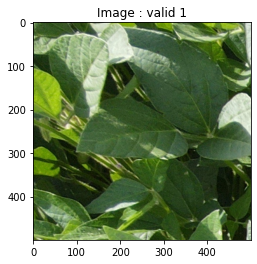

In [6]:
# Opening single Image 
image_open = Image.open("E:/Soybean/Soybean Original Dataset/train/Healthy/healthy (1).jpg")
plt.imshow(image_open)
plt.title('Image : valid 1')
plt.show()

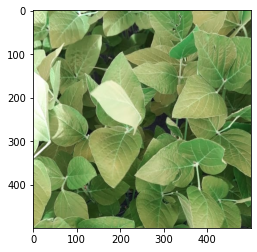

In [7]:
Train_dir = 'E:/Soybean/Soybean Original Dataset/train'
valid_dir= 'E:/Soybean/Soybean Original Dataset/valid'
Categories = ['Caterpillar', 'Diabrotica speciosa','Healthy' ]
for i in Categories:
    path = os.path.join(Train_dir,i)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        new_image=cv2.resize(old_image,(256,256))
        plt.imshow(old_image)
        plt.show()
        break
    break

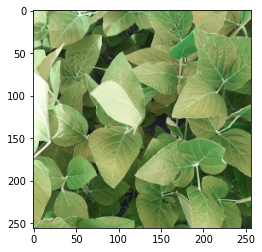

In [8]:
new_image=cv2.resize(old_image,(256,256))
plt.imshow(new_image)
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# datagen = ImageDataGenerator(rescale = 1/255,
#                             shear_range = 0.2,
#                             zoom_range = 0.2,
#                             horizontal_flip = True,
#                             vertical_flip = True,
#                             validation_split = 0.2)

# train_datagen = datagen.flow_from_directory(Train_dir,
#                                 target_size = (256,256),
#                                 batch_size =Batch_Size,
#                                 class_mode = 'categorical',
#                                 subset = 'training')
# val_datagen = datagen.flow_from_directory(Train_dir,
#                                          target_size = (256,256),
#                                     batch_size =Batch_Size,
#                                     class_mode = 'categorical',
#                                     subset = 'validation')

datagen = ImageDataGenerator(rescale = 1/255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            vertical_flip = True)

train_datagen = datagen.flow_from_directory(Train_dir,
                                target_size = (256,256),
                                batch_size =Batch_Size,
                                class_mode = 'categorical')
val_datagen = datagen.flow_from_directory(valid_dir,
                                         target_size = (256,256),
                                    batch_size =Batch_Size,
                                    class_mode = 'categorical')

Found 5129 images belonging to 3 classes.
Found 1281 images belonging to 3 classes.


EfficientNetB7

In [11]:
import tensorflow as tf
import efficientnet.tfkeras as efn
from tensorflow.keras.applications import  EfficientNetB7
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from IPython.display import SVG

In [ ]:
# !pip install efficientnet

In [ ]:
# #if previos cell show error,run this
# !pip install efficientnet

In [12]:
from keras import regularizers

In [13]:
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

base_model_efficientnet_b7=efn.EfficientNetB7(
            input_shape=(256, 256, 3),
            weights='imagenet',
            include_top=False )

In [14]:
from keras.layers import Flatten, BatchNormalization,Dense,Dropout

#freeze  the trainable layer 
for layer in base_model_efficientnet_b7.layers:
    layer.trainable= False
x=base_model_efficientnet_b7.output
x=MaxPooling2D(pool_size=(2,2)) (x)
x=Flatten()(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x = Dense(1024, activation='relu',kernel_regularizer=regularizers.L2(0.001))(x)
x = Dense(512, activation='relu',kernel_regularizer=regularizers.L2(0.001))(x)
prediction= Dense(no_of_class, activation='softmax')(x)


model_efficientnet_b7=Model(inputs=base_model_efficientnet_b7.inputs, outputs=prediction)


In [15]:
model_efficientnet_b7 .summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 128, 128, 64  256         ['stem_conv[0][0]']              
                                )                                                             

                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 32)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 8)      264         ['block1c_se_reshape[0][0]']     
                                                                                                  
 block1c_se_expand (Conv2D)     (None, 1, 1, 32)     288         ['block1c_se_reduce[0][0]']      
                                                                                                  
 block1c_s

 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 64, 64, 192)  0           ['block2a_activation[0][0]',     
                                                                  'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 64, 64, 48)   9216        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 64, 64, 48)  192         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_e

 block2c_drop (FixedDropout)    (None, 64, 64, 48)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 64, 64, 48)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 64, 64, 288)  13824       ['block2c_add[0][0]']            
                                                                                                  
 block2d_expand_bn (BatchNormal  (None, 64, 64, 288)  1152       ['block2d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2d_e

 block2f_expand_conv (Conv2D)   (None, 64, 64, 288)  13824       ['block2e_add[0][0]']            
                                                                                                  
 block2f_expand_bn (BatchNormal  (None, 64, 64, 288)  1152       ['block2f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2f_expand_activation (Act  (None, 64, 64, 288)  0          ['block2f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2f_dwconv (DepthwiseConv2  (None, 64, 64, 288)  2592       ['block2f_expand_activation[0][0]
 D)                                                              ']                               
          

 block3a_expand_activation (Act  (None, 64, 64, 288)  0          ['block3a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 32, 32, 288)  7200       ['block3a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3a_bn (BatchNormalization  (None, 32, 32, 288)  1152       ['block3a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3a_activation (Activation  (None, 32, 32, 288)  0          ['block3a_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block3c_se_squeeze (GlobalAver  (None, 480)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3c_se_squeeze[0][0]']     
                                                                                                  
 block3c_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3c_se_reshape[0][0]']     
                                                                                                  
 block3c_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3c_se_reduce[0][0]']      
          

 block3e_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3e_se_squeeze[0][0]']     
                                                                                                  
 block3e_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3e_se_reshape[0][0]']     
                                                                                                  
 block3e_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3e_se_reduce[0][0]']      
                                                                                                  
 block3e_se_excite (Multiply)   (None, 32, 32, 480)  0           ['block3e_activation[0][0]',     
                                                                  'block3e_se_expand[0][0]']      
                                                                                                  
 block3e_project_conv (Conv2D)  (None, 32, 32, 80)   38400       ['block3e_se_excite[0][0]']      
          

                                                                                                  
 block3g_se_excite (Multiply)   (None, 32, 32, 480)  0           ['block3g_activation[0][0]',     
                                                                  'block3g_se_expand[0][0]']      
                                                                                                  
 block3g_project_conv (Conv2D)  (None, 32, 32, 80)   38400       ['block3g_se_excite[0][0]']      
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 32, 32, 80)  320         ['block3g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3g_drop (FixedDropout)    (None, 32, 32, 80)   0           ['block3g_project_bn[0][0]']     
          

                                                                                                  
 block4b_add (Add)              (None, 16, 16, 160)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 16, 16, 960)  153600      ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 16, 16, 960)  3840       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 16, 16, 960)  0          ['block4c_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 16, 16, 960)  3840       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_expand_activation (Act  (None, 16, 16, 960)  0          ['block4e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4e_dwconv (DepthwiseConv2  (None, 16, 16, 960)  8640       ['block4e_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4e_b

 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 16, 16, 960)  8640       ['block4g_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4g_bn (BatchNormalization  (None, 16, 16, 960)  3840       ['block4g_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4g_activation (Activation  (None, 16, 16, 960)  0          ['block4g_bn[0][0]']             
 )                                                                                                
          

 block4i_bn (BatchNormalization  (None, 16, 16, 960)  3840       ['block4i_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4i_activation (Activation  (None, 16, 16, 960)  0          ['block4i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 960)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4i_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 16, 16, 1344  0           ['block5c_activation[0][0]',     
                                )                                 'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 16, 16, 224)  301056      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 16, 16, 224)  896        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

                                )                                 'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 16, 16, 224)  301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 16, 16, 224)  896        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_drop (FixedDropout)    (None, 16, 16, 224)  0           ['block5e_project_bn[0][0]']     
                                                                                                  
 block5e_add (Add)              (None, 16, 16, 224)  0           ['block5e_drop[0][0]',           
          

                                                                                                  
 block5g_project_bn (BatchNorma  (None, 16, 16, 224)  896        ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (FixedDropout)    (None, 16, 16, 224)  0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 16, 16, 224)  0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 16, 16, 1344  301056      ['block5g_add[0][0]']            
          

                                                                                                  
 block5i_drop (FixedDropout)    (None, 16, 16, 224)  0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 16, 16, 224)  0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 16, 16, 1344  301056      ['block5i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 16, 16, 1344  5376       ['block5j_expand_conv[0][0]']    
 ization) 

 block6b_expand_bn (BatchNormal  (None, 8, 8, 2304)  9216        ['block6b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 8, 8, 2304)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 8, 8, 2304)  57600       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 8, 8, 2304)  9216        ['block6b_dwconv[0][0]']         
 )        

                                                                                                  
 block6d_dwconv (DepthwiseConv2  (None, 8, 8, 2304)  57600       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 8, 8, 2304)  9216        ['block6d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 8, 8, 2304)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_s

 )                                                                                                
                                                                                                  
 block6f_activation (Activation  (None, 8, 8, 2304)  0           ['block6f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 2304)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6f_se_squeeze[0][0]']     
                                                                                                  
 block6f_s

 block6h_se_squeeze (GlobalAver  (None, 2304)        0           ['block6h_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6h_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6h_se_squeeze[0][0]']     
                                                                                                  
 block6h_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6h_se_reshape[0][0]']     
                                                                                                  
 block6h_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6h_se_reduce[0][0]']      
                                                                                                  
 block6h_se_excite (Multiply)   (None, 8, 8, 2304)   0           ['block6h_activation[0][0]',     
          

 block6j_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6j_se_reshape[0][0]']     
                                                                                                  
 block6j_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6j_se_reduce[0][0]']      
                                                                                                  
 block6j_se_excite (Multiply)   (None, 8, 8, 2304)   0           ['block6j_activation[0][0]',     
                                                                  'block6j_se_expand[0][0]']      
                                                                                                  
 block6j_project_conv (Conv2D)  (None, 8, 8, 384)    884736      ['block6j_se_excite[0][0]']      
                                                                                                  
 block6j_project_bn (BatchNorma  (None, 8, 8, 384)   1536        ['block6j_project_conv[0][0]']   
 lization)

                                                                  'block6l_se_expand[0][0]']      
                                                                                                  
 block6l_project_conv (Conv2D)  (None, 8, 8, 384)    884736      ['block6l_se_excite[0][0]']      
                                                                                                  
 block6l_project_bn (BatchNorma  (None, 8, 8, 384)   1536        ['block6l_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6l_drop (FixedDropout)    (None, 8, 8, 384)    0           ['block6l_project_bn[0][0]']     
                                                                                                  
 block6l_add (Add)              (None, 8, 8, 384)    0           ['block6l_drop[0][0]',           
          

 lization)                                                                                        
                                                                                                  
 block7b_expand_conv (Conv2D)   (None, 8, 8, 3840)   2457600     ['block7a_project_bn[0][0]']     
                                                                                                  
 block7b_expand_bn (BatchNormal  (None, 8, 8, 3840)  15360       ['block7b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7b_expand_activation (Act  (None, 8, 8, 3840)  0           ['block7b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7b_d

 ization)                                                                                         
                                                                                                  
 block7d_expand_activation (Act  (None, 8, 8, 3840)  0           ['block7d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7d_dwconv (DepthwiseConv2  (None, 8, 8, 3840)  34560       ['block7d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7d_bn (BatchNormalization  (None, 8, 8, 3840)  15360       ['block7d_dwconv[0][0]']         
 )                                                                                                
          

In [16]:

model_efficientnet_b7.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint=ModelCheckpoint(r'SoybeanDiseaseEfficientNetB7.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=patience_no,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
model_history = model_efficientnet_b7.fit(train_datagen, validation_data=val_datagen,
                          epochs = no_of_epoch,
                          callbacks =callbacks)

Epoch 1/150
161/161 [==============================] - ETA: 0s - loss: 7.2322 - accuracy: 0.6097
Epoch 1: val_loss improved from inf to 4.29336, saving model to SoybeanDiseaseEfficientNetB7.h5
161/161 [==============================] - 1073s 7s/step - loss: 7.2322 - accuracy: 0.6097 - val_loss: 4.2934 - val_accuracy: 0.7299
Epoch 2/150
161/161 [==============================] - ETA: 0s - loss: 3.7250 - accuracy: 0.7005
Epoch 2: val_loss improved from 4.29336 to 3.02954, saving model to SoybeanDiseaseEfficientNetB7.h5
161/161 [==============================] - 1066s 7s/step - loss: 3.7250 - accuracy: 0.7005 - val_loss: 3.0295 - val_accuracy: 0.7479
Epoch 3/150
161/161 [==============================] - ETA: 0s - loss: 2.6562 - accuracy: 0.7132
Epoch 3: val_loss improved from 3.02954 to 2.18719, saving model to SoybeanDiseaseEfficientNetB7.h5
161/161 [==============================] - 1055s 7s/step - loss: 2.6562 - accuracy: 0.7132 - val_loss: 2.1872 - val_accuracy: 0.7627
Epoch 4/150
16

161/161 [==============================] - 1046s 7s/step - loss: 0.9050 - accuracy: 0.7604 - val_loss: 0.7830 - val_accuracy: 0.7939
Epoch 28/150
161/161 [==============================] - ETA: 0s - loss: 0.9319 - accuracy: 0.7637
Epoch 28: val_loss improved from 0.78298 to 0.73828, saving model to SoybeanDiseaseEfficientNetB7.h5
161/161 [==============================] - 1040s 6s/step - loss: 0.9319 - accuracy: 0.7637 - val_loss: 0.7383 - val_accuracy: 0.8314
Epoch 29/150
161/161 [==============================] - ETA: 0s - loss: 0.8716 - accuracy: 0.7797
Epoch 29: val_loss did not improve from 0.73828
161/161 [==============================] - 1038s 6s/step - loss: 0.8716 - accuracy: 0.7797 - val_loss: 0.8156 - val_accuracy: 0.8072
Epoch 30/150
161/161 [==============================] - ETA: 0s - loss: 0.8565 - accuracy: 0.7738
Epoch 30: val_loss did not improve from 0.73828
161/161 [==============================] - 1033s 6s/step - loss: 0.8565 - accuracy: 0.7738 - val_loss: 0.7465 

Epoch 56/150
161/161 [==============================] - ETA: 0s - loss: 0.7945 - accuracy: 0.8007
Epoch 56: val_loss did not improve from 0.65687
161/161 [==============================] - 1070s 7s/step - loss: 0.7945 - accuracy: 0.8007 - val_loss: 0.7339 - val_accuracy: 0.8298
Epoch 57/150
161/161 [==============================] - ETA: 0s - loss: 0.8346 - accuracy: 0.7982
Epoch 57: val_loss did not improve from 0.65687
161/161 [==============================] - 1092s 7s/step - loss: 0.8346 - accuracy: 0.7982 - val_loss: 0.7754 - val_accuracy: 0.8478
Epoch 58/150
161/161 [==============================] - ETA: 0s - loss: 0.8442 - accuracy: 0.7926
Epoch 58: val_loss did not improve from 0.65687
161/161 [==============================] - 1092s 7s/step - loss: 0.8442 - accuracy: 0.7926 - val_loss: 0.7029 - val_accuracy: 0.8517
Epoch 59/150
161/161 [==============================] - ETA: 0s - loss: 0.8430 - accuracy: 0.8004
Epoch 59: val_loss did not improve from 0.65687
161/161 [========

Epoch 85/150
161/161 [==============================] - ETA: 0s - loss: 0.7874 - accuracy: 0.8000
Epoch 85: val_loss did not improve from 0.60705
161/161 [==============================] - 1074s 7s/step - loss: 0.7874 - accuracy: 0.8000 - val_loss: 0.6609 - val_accuracy: 0.8462
Epoch 86/150
161/161 [==============================] - ETA: 0s - loss: 0.7586 - accuracy: 0.7998
Epoch 86: val_loss did not improve from 0.60705
161/161 [==============================] - 1063s 7s/step - loss: 0.7586 - accuracy: 0.7998 - val_loss: 0.6349 - val_accuracy: 0.8556
Epoch 87/150
161/161 [==============================] - ETA: 0s - loss: 0.7143 - accuracy: 0.8039
Epoch 87: val_loss did not improve from 0.60705
161/161 [==============================] - 1074s 7s/step - loss: 0.7143 - accuracy: 0.8039 - val_loss: 0.6264 - val_accuracy: 0.8525
Epoch 88/150
161/161 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.8081
Epoch 88: val_loss did not improve from 0.60705
161/161 [========

161/161 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.8083
Epoch 113: val_loss did not improve from 0.53395
161/161 [==============================] - 1058s 7s/step - loss: 0.6561 - accuracy: 0.8083 - val_loss: 0.5633 - val_accuracy: 0.8462
Epoch 114/150
161/161 [==============================] - ETA: 0s - loss: 0.6486 - accuracy: 0.8107
Epoch 114: val_loss did not improve from 0.53395
161/161 [==============================] - 1028s 6s/step - loss: 0.6486 - accuracy: 0.8107 - val_loss: 0.5632 - val_accuracy: 0.8540
Epoch 115/150
161/161 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.8060
Epoch 115: val_loss did not improve from 0.53395
161/161 [==============================] - 1030s 6s/step - loss: 0.6595 - accuracy: 0.8060 - val_loss: 0.5482 - val_accuracy: 0.8525
Epoch 116/150
161/161 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.8140
Epoch 116: val_loss did not improve from 0.53395
161/161 [==============

In [ ]:
hist_df = pd.DataFrame(model_history.history) 
hist_df.to_csv('EfficientB7.csv', index=False)
hist_df

In [ ]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Confution Matrix 
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names= ['Caterpillar', 'Diabrotica speciosa','Healthy' ]
Y_pred = model.predict_generator(val_datagen)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(val_datagen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(val_datagen.classes, y_pred, target_names=target_names))

Classification Report
                     precision    recall  f1-score   support

        Caterpillar       0.53      0.61      0.57       616
Diabrotica speciosa       0.36      0.27      0.31       373
            Healthy       0.15      0.14      0.14       160

           accuracy                           0.44      1149
          macro avg       0.34      0.34      0.34      1149
       weighted avg       0.42      0.44      0.42      1149



In [ ]:
#Save the model
model.save('SoybeanDiseaseEfficientNetB7.h5')

In [ ]:
#Test the model
model = load_model('SoybeanDiseaseEfficientNetB7.h5')

test_image="E:/Soybean/Soybean Original Dataset/valid/Healthy/healthy (84).jpg"
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)

result=model.predict(test_image)
print(np.argmax(result))
Categories = ['Caterpillar', 'Diabrotica speciosa','Healthy' ]
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()